<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/MLA5_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 5
Jacob Vallery <br>CS430-ON <br>Machine Learning in the Cloud

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for specific models

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Imports for Splitting Data and Building Pipeline

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#more than likely use this one

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix Function

In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

#Acquire Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [6]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')

In [7]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

#Statistics and Visual Exploration

In [9]:
land_types_train = landsat_train['land_type'].value_counts()

In [10]:
land_types_test = landsat_test['land_type'].value_counts()

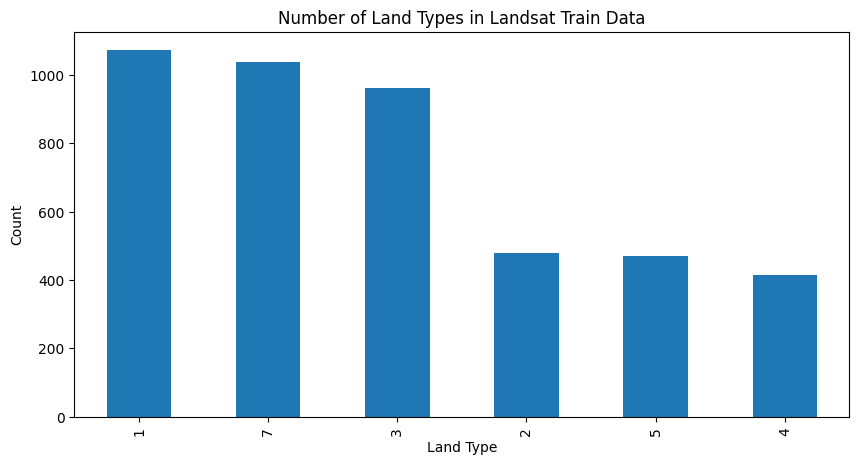

In [21]:

plt.figure(figsize=(10, 5))
land_types_train.plot(kind='bar')
plt.title('Number of Land Types in Landsat Train Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

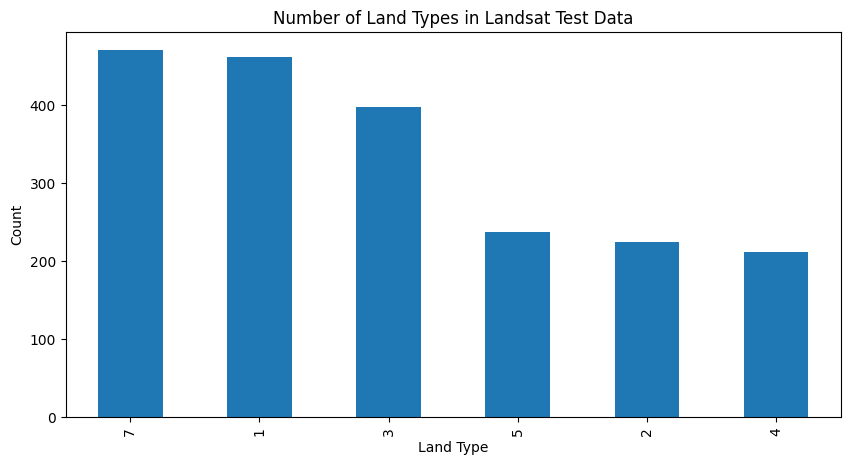

In [12]:

plt.figure(figsize=(10, 5))
land_types_test.plot(kind='bar')
plt.title('Number of Land Types in Landsat Test Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()


#Splitting Data into Train/Test
 - the data is already split into train/test, but you will have to manually split it further.

In [22]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [25]:
X_train = landsat_train.iloc[:,0:-1]
X_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


In [26]:
X_test = landsat_test.iloc[:,0:-1]
X_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,80,102,102,79,76,102,102,79,76,102,...,109,87,79,107,109,87,79,107,113,87
1,76,102,102,79,76,102,106,83,76,102,...,109,87,79,107,113,87,79,103,104,83
2,80,98,106,79,76,94,102,76,76,94,...,104,79,79,95,100,79,79,95,96,75
3,76,94,102,76,76,94,102,76,76,94,...,100,79,79,95,96,75,79,95,100,75
4,76,94,102,76,76,94,102,76,76,89,...,96,75,79,95,100,75,75,95,100,79


In [27]:
y_train = landsat_train['land_type']
y_train.head()

,land_type
0,3
1,3
2,3
3,3
4,3


In [28]:
y_test = landsat_test['land_type']
y_test.head()

,land_type
0,3
1,3
2,4
3,4
4,4


#Building the Pipeline

In [29]:
num_attribs = landsat_train.columns[0:-1]
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),])

In [30]:
random_forest = Pipeline([
                           ('transform', col_transform),
                           ('rf',RandomForestClassifier(n_estimators=1000, max_samples=100, bootstrap=True))
                     ])

#Executing the Model

In [31]:
random_forest.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=100, n_estimators=1000))])

#Evaluating the Model

In [32]:
y_pred = random_forest.predict(X_test)

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.98      0.89      0.93       507
           2       0.93      0.98      0.96       213
           3       0.96      0.85      0.90       447
           4       0.55      0.63      0.59       182
           5       0.67      0.90      0.77       176
           7       0.84      0.83      0.83       475

    accuracy                           0.85      2000
   macro avg       0.82      0.85      0.83      2000
weighted avg       0.87      0.85      0.86      2000



In [34]:
classes = random_forest.named_steps.rf.classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

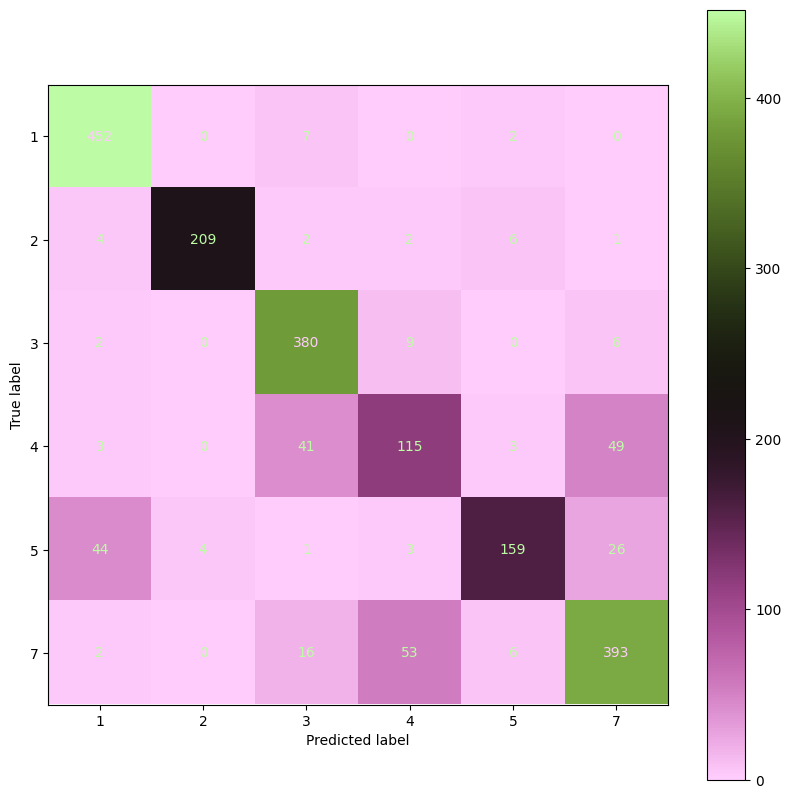

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='vanimo')

#Conclusion

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type

#Problem 2

#Statistics and Visual Exploration

#Splitting Data into Train/Test